<a href="https://colab.research.google.com/github/RahulChona11091991/Python/blob/main/Jan10_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [112]:
!pip install nlpaug


In [141]:
import pandas as pd
import nlpaug.augmenter.word as naw

# Assuming 'df' is your DataFrame
df = pd.read_csv('/content/Description_UniFormatCode.csv')

df

,Description,Stage
0,SALES,X9090.BH
1,Truss Allowance,B1020.TR
2,ADDRESS PLAQUES,G2060.AP
3,"SUBSTRUCTURE EXCAVATION - EXCAVATION, BACKFILL...",A9010.EX
4,Cost estimate for hauling excavated material to/,A9010.EX
...,...,...
904,PLUMBING FIXTURES,D2010.PB
905,Run Electrical Service to Detached Garage Pad.,D5030.EL
906,WIP - ALLOCATIONS,B2010.LM
907,CLEANING AND WASTE MANAGEMENT - INTERIOR AND W...,Z1070.CL


In [114]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [142]:
import pandas as pd
import nlpaug.augmenter.word as naw

# Assuming 'df' is your DataFrame
# df = pd.read_csv('/content/Description_UniFormatCode.csv')


# Assuming 'df' is your DataFrame with columns 'Description' and 'Stage'
texts = df['Description'].tolist()

# Function to perform synonym replacement augmentation
def augment_text(text, label, n=1):
    aug = naw.SynonymAug()
    augmented_texts = [aug.augment(text) for _ in range(n)]
    return [(aug_text, label) for aug_text in augmented_texts]

# Augment the text data
augmented_data = []
for index, row in df.iterrows():
    text, label = row['Description'], row['Stage']
    augmented_data.extend(augment_text(text, label, n=5))  # Adjust 'n' based on your needs

# Convert the augmented data back to a DataFrame
augmented_df = pd.DataFrame(augmented_data, columns=['Description', 'Stage'])

# Concatenate the original and augmented data
combined_df = pd.concat([df, augmented_df], ignore_index=True)
combined_df



,Description,Stage
0,SALES,X9090.BH
1,Truss Allowance,B1020.TR
2,ADDRESS PLAQUES,G2060.AP
3,"SUBSTRUCTURE EXCAVATION - EXCAVATION, BACKFILL...",A9010.EX
4,Cost estimate for hauling excavated material to/,A9010.EX
...,...,...
5449,[LANDSCAPING natural action - GRADING AND LAND...,G2080.GL
5450,[landscape gardening ACTIVITIES - GRADING AND ...,G2080.GL
5451,[LANDSCAPING action - GRADING AND landscape ga...,G2080.GL
5452,[landscape gardening ACTIVITIES - GRADING AND ...,G2080.GL


In [143]:
import re
from nltk.corpus import stopwords
from bs4 import BeautifulSoup
import pandas as pd

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;]')
BAD_SYMBOLS_RE = re.compile('[^0-9a-z #+_]')
STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    """
        text: a string

        return: modified initial string
    """
    text = BeautifulSoup(text, "lxml").text # HTML decoding
    text = text.lower() # lowercase text
    text = REPLACE_BY_SPACE_RE.sub(' ', text) # replace REPLACE_BY_SPACE_RE symbols by space in text
    text = BAD_SYMBOLS_RE.sub('', text) # delete symbols which are in BAD_SYMBOLS_RE from text
    text = ' '.join(word for word in text.split() if word not in STOPWORDS) # delete stopwors from text
    return text

# col = pd.Series(combined_df.Description)
# fr = {"Description":col}
# df_new = pd.DataFrame(fr)

# df_new = pd.DataFrame(combined_df)
df_new = combined_df
df_new['Description'] = df_new['Description'].astype('str').apply(clean_text)

# df_new
df_new

<ipython-input-143-14a65180ce7d>:16: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  text = BeautifulSoup(text, "lxml").text # HTML decoding


,Description,Stage
0,sales,X9090.BH
1,truss allowance,B1020.TR
2,address plaques,G2060.AP
3,substructure excavation excavation backfill,A9010.EX
4,cost estimate hauling excavated material,A9010.EX
...,...,...
5449,landscaping natural action grading landscaping,G2080.GL
5450,landscape gardening activities grading landsca...,G2080.GL
5451,landscaping action grading landscape gardening,G2080.GL
5452,landscape gardening activities grading landsca...,G2080.GL


In [144]:
df_new = df_new.sample(frac = 1)

df_new

,Description,Stage
3773,led flushmount 12 ortech 2300 oregon aecolux 2...,D5040.LT
2887,wip allotment,B2010.LM
757,wip allocations,B2010.LM
1760,wip allocations,2030.GT
1115,wip parcelling,A1010.LB
...,...,...
2141,wip parceling,A1020.SP
4340,lumber spf kd 2 btr 2 tenner quaternary x eight,B2010.LM
5276,window treatments,E2010.WT
1218,wip allocations,A9010.EX


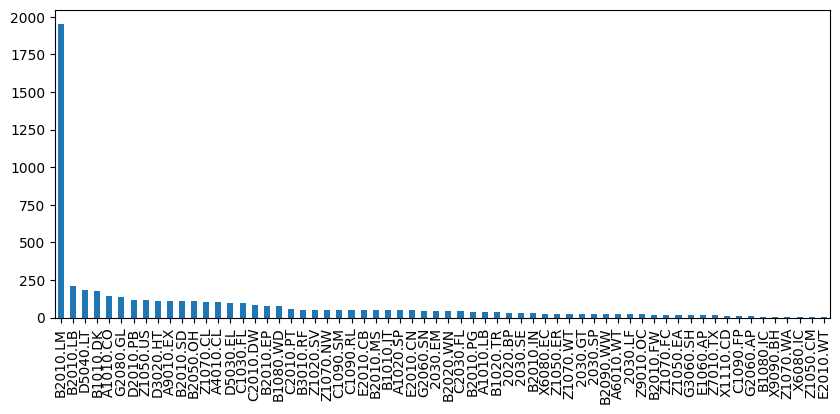

In [145]:
import matplotlib.pyplot as plt

my_tags =['X9090.BH', 'B1020.TR', 'G2060.AP', 'A9010.EX', 'G2080.GL',
       '2020.BP', 'Z1020.SV', 'Z1070.NW', 'B2010.MS', 'Z1050.CM',
       'X6080.IC', 'A1010.LB', '2030.SE', 'B2010.PG', 'X1110.CD',
       'B2010.SD', 'C2010.PT', 'B2010.LB', 'D3020.HT', 'C2030.FL',
       'C2010.DW', 'Z1070.WT', 'C1090.FP', 'Z1050.US', 'B2010.LM',
       'A6010.WT', '2030.LF', 'Z1070.WA', 'C1090.SM', 'B3010.RF',
       'X6080.EC', 'E2010.CN', 'A1010.CO', 'D2010.PB', 'C1090.RL',
       'B2050.OH', 'B2020.WN', 'B2010.IN', 'Z1050.ER', 'B2090.WW',
       'B2010.EP', 'Z9010.OC', 'B1010.JT', 'Z1050.EA', 'B1010.DK',
       'A4010.CL', 'Z1070.CL', 'D5030.EL', 'B2010.FW', 'Z7010.TX',
       'Z1070.FC', '2030.SP', 'G3060.SH', '2030.EM', 'G2060.SN',
       '2030.GT', 'D5040.LT', 'E2010.CB', 'B1080.WD', 'A1020.SP',
       'E1060.AP', 'C1030.FL', 'B1080.IC', 'E2010.WT']
plt.figure(figsize=(10,4))
combined_df.Stage.value_counts().plot(kind='bar');

In [146]:
df_new['Description'].apply(lambda x: len(x.split(' '))).sum()


22931

In [147]:
df_new.info

<bound method DataFrame.info of                                             Description     Stage
3773  led flushmount 12 ortech 2300 oregon aecolux 2...  D5040.LT
2887                                      wip allotment  B2010.LM
757                                     wip allocations  B2010.LM
1760                                    wip allocations   2030.GT
1115                                     wip parcelling  A1010.LB
...                                                 ...       ...
2141                                      wip parceling  A1020.SP
4340    lumber spf kd 2 btr 2 tenner quaternary x eight  B2010.LM
5276                                  window treatments  E2010.WT
1218                                    wip allocations  A9010.EX
4926        interior cleaning complete per signed reach  Z1070.CL

[5454 rows x 2 columns]>

In [148]:
# 1. Import necessary libraries:

import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.linear_model import LogisticRegression  # Example model, choose based on your problem
from sklearn.metrics import classification_report, accuracy_score


In [149]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming 'Description' is the text column you want to encode
Description_keywords = df_new['Description']

# Convert the text data into numerical features using CountVectorizer
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(Description_keywords)

# Assuming 'Stages' is the target variable for classification
y = df_new['Stage']


In [150]:
# 2. Load and split your dataset:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state = 42)

In [158]:
# Initialize the logistic regression model
model = LogisticRegression()

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy: 0.8063530849114233
Classification Report:
               precision    recall  f1-score   support

     2020.BP       1.00      1.00      1.00         4
     2030.EM       1.00      0.38      0.55        16
     2030.GT       1.00      0.17      0.29         6
     2030.LF       1.00      0.83      0.91         6
     2030.SE       1.00      0.57      0.73         7
     2030.SP       1.00      0.33      0.50         9
    A1010.CO       1.00      0.26      0.42        42
    A1010.LB       0.50      0.25      0.33         4
    A1020.SP       1.00      0.33      0.50         9
    A4010.CL       1.00      0.83      0.91        30
    A6010.WT       1.00      0.25      0.40         8
    A9010.EX       1.00      0.37      0.54        38
    B1010.DK       1.00      0.32      0.49        56
    B1010.JT       1.00      0.40      0.57        10
    B1020.TR       1.00      0.62      0.77         8
    B1080.IC       1.00      0.67      0.80         3
    B1080.WD       0.86     

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [23]:
# 3. Compute class weights:
class_weights = compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)
class_weight_dict = dict(zip(np.unique(y_train), class_weights))


In [24]:
class_weight_dict

{'2020.BP': 2.524884259259259,
 '2030.EM': 2.065814393939394,
 '2030.GT': 3.5879934210526314,
 '2030.LF': 3.787326388888889,
 '2030.SE': 2.6219951923076925,
 '2030.SP': 3.5879934210526314,
 'A1010.CO': 0.6086774553571429,
 'A1010.LB': 2.6219951923076925,
 'A1020.SP': 1.704296875,
 'A4010.CL': 0.8313643292682927,
 'A6010.WT': 3.40859375,
 'A9010.EX': 0.7574652777777777,
 'B1010.DK': 0.5012637867647058,
 'B1010.JT': 2.2723958333333334,
 'B1020.TR': 2.4347098214285716,
 'B1080.IC': 17.04296875,
 'B1080.WD': 1.032907196969697,
 'B2010.EP': 1.032907196969697,
 'B2010.FW': 4.544791666666667,
 'B2010.IN': 2.8404947916666665,
 'B2010.LB': 0.4082148203592814,
 'B2010.LM': 0.044498612924281984,
 'B2010.MS': 1.6627286585365855,
 'B2010.PG': 2.524884259259259,
 'B2010.SD': 0.7101236979166666,
 'B2020.WN': 1.9477678571428572,
 'B2050.OH': 0.7835847701149425,
 'B2090.WW': 3.098721590909091,
 'B3010.RF': 1.704296875,
 'C1030.FL': 0.8739983974358975,
 'C1090.FP': 8.521484375,
 'C1090.RL': 1.6627286585

In [167]:
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# 4. Train your model with class weights:

# Initialize the logistic regression model
model = LogisticRegression(class_weight=class_weight_dict, random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = model.predict(X_test)


# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Display classification report and confusion matrix
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

# Calculate AUC-ROC if applicable (binary classification)
# If you have a multiclass problem, you can use one-vs-rest strategy
auc_roc = roc_auc_score(y_test, model.predict_proba(X_test), multi_class='ovr')
print("AUC-ROC:", auc_roc)



# model = LogisticRegression(class_weight=class_weight_dict, random_state=42)
# model.fit(X_train, y_train)

Accuracy: 0.5406230910201588
Classification Report:
               precision    recall  f1-score   support

     2020.BP       1.00      1.00      1.00         4
     2030.EM       1.00      0.44      0.61        16
     2030.GT       1.00      0.17      0.29         6
     2030.LF       0.86      1.00      0.92         6
     2030.SE       0.05      0.86      0.10         7
     2030.SP       0.60      0.33      0.43         9
    A1010.CO       1.00      0.26      0.42        42
    A1010.LB       0.50      0.25      0.33         4
    A1020.SP       0.06      0.33      0.10         9
    A4010.CL       1.00      0.83      0.91        30
    A6010.WT       0.75      0.38      0.50         8
    A9010.EX       1.00      0.37      0.54        38
    B1010.DK       1.00      0.32      0.49        56
    B1010.JT       0.02      0.70      0.03        10
    B1020.TR       1.00      0.62      0.77         8
    B1080.IC       1.00      1.00      1.00         3
    B1080.WD       1.00     

In [170]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42, class_weight= class_weight_dict)

# Train the model
rf_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.5387904703726328
Classification Report:
               precision    recall  f1-score   support

     2020.BP       1.00      1.00      1.00         4
     2030.EM       0.19      0.38      0.26        16
     2030.GT       0.08      0.33      0.12         6
     2030.LF       1.00      1.00      1.00         6
     2030.SE       0.06      0.71      0.12         7
     2030.SP       1.00      0.33      0.50         9
    A1010.CO       1.00      0.26      0.42        42
    A1010.LB       0.03      0.25      0.05         4
    A1020.SP       1.00      0.33      0.50         9
    A4010.CL       1.00      0.83      0.91        30
    A6010.WT       1.00      0.25      0.40         8
    A9010.EX       1.00      0.34      0.51        38
    B1010.DK       0.90      0.32      0.47        56
    B1010.JT       0.02      0.70      0.03        10
    B1020.TR       0.22      0.62      0.32         8
    B1080.IC       1.00      1.00      1.00         3
    B1080.WD       1.00     

In [179]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.models import Sequential
from keras.layers import Embedding, LSTM, Dense
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have a DataFrame named 'df' with a text feature 'text' and a multi-class categorical target 'target'
# Replace 'path/to/your/dataset.csv' with the actual path to your dataset file
# df = pd.read_csv('path/to/your/dataset.csv')

# Separate features (X) and target variable (y)
X = df_new['Description']
y = df_new['Stage']

# Convert target labels to numerical format
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Tokenize and pad the text data
max_words = 10000  # Adjust based on your dataset
max_len = 100  # Adjust based on your dataset

tokenizer = Tokenizer(num_words=max_words, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n', lower=True)
tokenizer.fit_on_texts(X)
X_sequences = tokenizer.texts_to_sequences(X)
X_padded = pad_sequences(X_sequences, maxlen=max_len)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_padded, y_encoded, test_size=0.2, random_state=42)

# Build the deep learning model
model = Sequential()
model.add(Embedding(input_dim=max_words, output_dim=100, input_length=max_len))
model.add(LSTM(units=64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(units=len(label_encoder.classes_), activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=15, batch_size=32, validation_split=0.2)

# # Make predictions on the test set
# y_pred = model.predict_classes(X_test)

# # Decode numerical predictions back to labels
# y_pred_labels = label_encoder.inverse_transform(y_pred)

# Make predictions on the test set
y_pred_probs = model.predict(X_test)

# Extract the predicted classes using argmax
y_pred = np.argmax(y_pred_probs, axis=1)

# Decode numerical predictions back to labels
y_pred_labels = label_encoder.inverse_transform(y_pred)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
# print("Classification Report:\n", classification_report(y_test, y_pred_labels))


Epoch 1/15
110/110 [==============================] - 24s 170ms/step - loss: 3.1638 - accuracy: 0.3605 - val_loss: 2.8433 - val_accuracy: 0.3883
Epoch 2/15
110/110 [==============================] - 20s 179ms/step - loss: 2.5406 - accuracy: 0.4461 - val_loss: 2.4125 - val_accuracy: 0.4696
Epoch 3/15
110/110 [==============================] - 19s 170ms/step - loss: 2.0477 - accuracy: 0.5619 - val_loss: 1.9804 - val_accuracy: 0.5590
Epoch 4/15
110/110 [==============================] - 19s 176ms/step - loss: 1.6571 - accuracy: 0.6464 - val_loss: 1.6679 - val_accuracy: 0.6690
Epoch 5/15
110/110 [==============================] - 19s 169ms/step - loss: 1.3836 - accuracy: 0.7341 - val_loss: 1.4194 - val_accuracy: 0.7079
Epoch 6/15
110/110 [==============================] - 18s 167ms/step - loss: 1.2109 - accuracy: 0.7688 - val_loss: 1.2799 - val_accuracy: 0.7320
Epoch 7/15
110/110 [==============================] - 20s 179ms/step - loss: 1.1083 - accuracy: 0.7877 - val_loss: 1.2112 - val_ac